# 장애인콜택시 대기시간 예측
## 단계2. 탐색적 데이터 분석

## 0.미션

* 1.개별 변수 분석하기
    * 앞서 생성된 각 변수들 특히 추가로 생성한 변수들에 대해서 단변량 분석을 수행합니다. 
    * 시각화 : Histogram, Boxplot, Barplot
    * 통계량 : 기초 통계량.
    * [옵션] 날짜 요소 관점을 추가해서 EDA 를 수행하시오.
* 2.Features와 Target의 관계 분석하기
    * Target은 숫자입니다.
    * 숫자형 feature들과 Target 과의 관계
        * 한꺼번에 상관관계를 확인하는 방법을 이용하여 분석합시다.
    * 범주형 feature들과 Target
        * sns.barplot, t-검정, 분산분석 등을 이용하여 분석합니다.
    * Target과 관련이 높은 feature와 그렇지 않은 feature를 정리해 봅시다.

## 1.환경설정

* 세부 요구사항
    - 경로 설정 : 다음의 두가지 방법 중 하나를 선택하여 폴더를 준비하고 데이터를 로딩하시오.
        * 1) 로컬 수행(Ananconda)
            * 제공된 압축파일을 다운받아 압축을 풀고
            * anaconda의 root directory(보통 C:/Users/< ID > 에 project 폴더를 만들고, 복사해 넣습니다.
        * 2) 구글콜랩
            * 구글 드라이브 바로 밑에 project 폴더를 만들고, 
            * 데이터 파일을 복사해 넣습니다.
    - 라이브러리 설치 및 로딩
        * requirements.txt 파일로 부터 라이브러리 설치
    - 기본적으로 필요한 라이브러리를 import 하도록 코드가 작성되어 있습니다. 
        * 필요하다고 판단되는 라이브러리를 추가하세요.


### (1) 경로 설정

#### 1) 로컬 수행(Anaconda)
* project 폴더에 필요한 파일들을 넣고, 본 파일을 열었다면, 별도 경로 지정이 필요하지 않습니다.

In [ ]:
path = ''

#### 2) 구글 콜랩 수행

* 구글 드라이브 연결

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
path = '/content/drive/MyDrive/project/'

### (2) 라이브러리 설치 및 불러오기

#### 1) 설치

* requirements.txt 파일을 아래 위치에 두고 다음 코드를 실행하시오.
    * 로컬 : 다음 코드셀 실행
    * 구글콜랩 : requirements.txt 파일을 왼쪽 [파일]탭에 복사해 넣고 다음 코드셀 실행

In [1]:
!pip install -r requirements.txt

ERROR: Cannot install numpy==1.22.4 and pandas==1.5.3 because these package versions have conflicting dependencies.
ERROR: ResolutionImpossible: for help visit https://pip.pypa.io/en/latest/topics/dependency-resolution/#dealing-with-dependency-conflicts


  Using cached numpy-1.22.4.zip (11.5 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Using cached xgboost-1.7.5-py3-none-win_amd64.whl (70.9 MB)
INFO: pip is looking at multiple versions of pandas to determine which version is compatible with other requirements. This could take a while.

The conflict is caused by:
    The user requested numpy==1.22.4
    pandas 1.5.3 depends on numpy>=1.21.0; python_version >= "3.10"
    pandas 1.5.3 depends on numpy>=1.23.2; python_version >= "3.11"

To fix this you could try to:
1. loosen the range of package versions you've specified
2. remove package versions to allow pip attempt to solve the dependency conflict



#### 2) 라이브러리 로딩

* **세부 요구사항**
    - 기본적으로 필요한 라이브러리를 import 하도록 코드가 작성되어 있습니다.
    - 필요하다고 판단되는 라이브러리를 추가하세요.

In [218]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as spst
import joblib

# 필요하다고 판단되는 라이브러리를 추가하세요.

### (3) 데이터 불러오기
* **세부 요구사항**
    - 전처리 단계에서 저장한 파일을 불러옵니다. data1pkl

In [219]:
file1 = 'data1.pkl'

In [220]:
file1 = joblib.load(file1)

In [221]:
file1

,car_cnt,request_cnt,ride_cnt,waiting_time,fare,distance,weekday,month,week,year,...,temp_min,rain(mm),humidity_max(%),humidity_min(%),sunshine(MJ/m2),season,raining,holiday,waiting_time_last_7days,ride_rate(%)
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-01,213,1023,924,23.2,2427,10764,Thursday,1,1,2015,...,-8.9,0.0,63.0,28.0,9.07,Winter,0,1,NaN,90.322581
2015-01-02,420,3158,2839,17.2,2216,8611,Friday,1,1,2015,...,-9.2,0.0,73.0,37.0,8.66,Winter,0,0,NaN,89.898670
2015-01-03,209,1648,1514,26.2,2377,10198,Saturday,1,1,2015,...,0.2,0.0,89.0,58.0,5.32,Winter,0,1,NaN,91.868932
2015-01-04,196,1646,1526,24.5,2431,10955,Sunday,1,1,2015,...,-0.9,0.0,95.0,52.0,6.48,Winter,0,1,NaN,92.709599
2015-01-05,421,4250,3730,26.2,2214,8663,Monday,1,2,2015,...,-7.4,3.4,98.0,29.0,10.47,Winter,1,0,NaN,87.764706
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-27,669,5635,4654,44.4,2198,8178,Tuesday,12,52,2022,...,-5.4,0.1,92.0,40.0,10.86,Winter,1,0,42.771429,82.590949
2022-12-28,607,5654,4648,44.8,2161,7882,Wednesday,12,52,2022,...,-7.8,0.0,71.0,34.0,10.88,Winter,0,0,43.514286,82.207287
2022-12-29,581,5250,4247,52.5,2229,8433,Thursday,12,52,2022,...,-4.0,0.0,87.0,38.0,10.84,Winter,0,0,42.957143,80.895238


## 2.EDA : 1단계 - 개별 정보 분석하기

* **세부요구사항**
    * 의미 있는 변수들을 7개 이상 선정하고 단변량분석을 수행합니다. 
    * [옵션] 각 변수에 대한 탐색시, 요일별, 월별, 연도별로 나눠서도 확인해보세요.
    * 단변량 분석을 위한 코드를 함수로 작성하고 수행하세요.

### (1) 단변량 분석 함수 작성
* **세부요구사항**
    * 코드가 반복되므로, 시각화와 기초통계량을 한꺼번에 처리하는 함수를 생성합시다.
    * 포함되어야 할 내용 : 
        * 기초통계량
            * 숫자 : .describe()
            * 범주 : 범주별 빈도수/비율
        * 시각화


In [222]:
# 숫자형 변수 분석
file1.describe()

,car_cnt,request_cnt,ride_cnt,waiting_time,fare,distance,month,week,year,waiting_time_next_day,temp_max,temp_min,rain(mm),humidity_max(%),humidity_min(%),sunshine(MJ/m2),raining,holiday,waiting_time_last_7days,ride_rate(%)
count,2922.000000,2922.000000,2922.000000,2922.000000,2922.000000,2922.000000,2922.000000,2922.0,2922.000000,2921.000000,2921.000000,2921.000000,2921.000000,2921.000000,2921.000000,2921.000000,2922.000000,2922.000000,2916.000000,2922.000000
mean,418.701916,3925.607803,3283.895277,40.305681,2304.272416,9253.500000,6.522930,26.644422,2018.499658,40.311537,18.077405,9.414618,3.356761,79.104074,41.119411,13.497693,0.285421,0.313826,40.322693,84.157675
std,133.755162,1509.741713,1249.165876,14.098550,107.260080,1019.198152,3.449293,15.066866,2.291531,14.097409,10.706655,10.784649,12.597807,14.024176,16.401564,6.941039,0.451692,0.464126,12.029476,5.217199
min,132.000000,527.000000,462.000000,17.200000,2131.000000,7672.000000,1.000000,1.0,2015.000000,17.200000,-11.200000,-18.500000,0.000000,29.000000,7.000000,0.000000,0.000000,0.000000,18.800000,59.699625
25%,278.000000,2162.500000,1779.000000,29.600000,2228.000000,8521.000000,4.000000,14.0,2016.250000,29.600000,9.000000,0.500000,0.000000,70.000000,29.000000,8.240000,0.000000,0.000000,31.357143,80.596003
50%,454.000000,4720.500000,3932.500000,38.200000,2257.000000,8821.500000,7.000000,27.0,2018.500000,38.200000,19.700000,10.000000,0.000000,82.000000,39.000000,12.680000,0.000000,0.000000,39.042857,84.561544
75%,522.000000,5110.000000,4241.000000,48.600000,2400.750000,10153.000000,10.000000,40.0,2020.000000,48.600000,27.400000,18.900000,0.300000,90.000000,51.000000,18.580000,1.000000,1.000000,47.007143,87.772009
max,1413.000000,6182.000000,5189.000000,96.100000,2733.000000,14136.000000,12.000000,53.0,2022.000000,96.100000,39.400000,30.400000,178.900000,100.000000,98.000000,30.790000,1.000000,1.000000,83.928571,96.884422


In [223]:
# 범주형 변수 분석
file1['raining'].value_counts()

0    2088
1     834
Name: raining, dtype: int64

In [224]:
file1['raining'].value_counts(normalize=True)

0    0.714579
1    0.285421
Name: raining, dtype: float64

In [225]:
file1['season'].value_counts()

Spring    736
Summer    736
Autumn    728
Winter    722
Name: season, dtype: int64

In [226]:
file1['season'].value_counts(normalize=True)

Spring    0.251882
Summer    0.251882
Autumn    0.249144
Winter    0.247091
Name: season, dtype: float64

### (2) 숫자형 변수
* 이제 숫자형 변수들에 대해서 단변량 분석을 수행합니다.

### 1. 탑승률(%)

<Axes: xlabel='ride_rate(%)', ylabel='Count'>

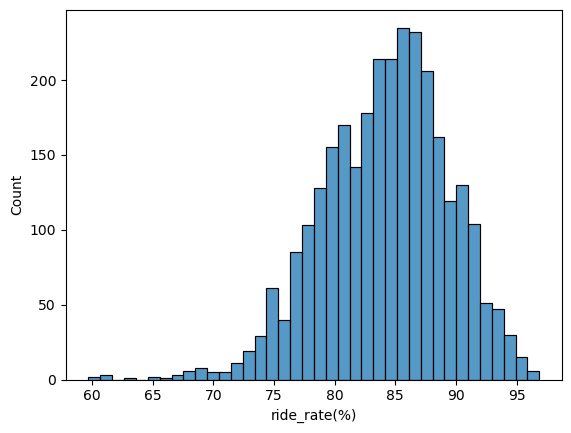

In [227]:
sns.histplot(file1['ride_rate(%)'])

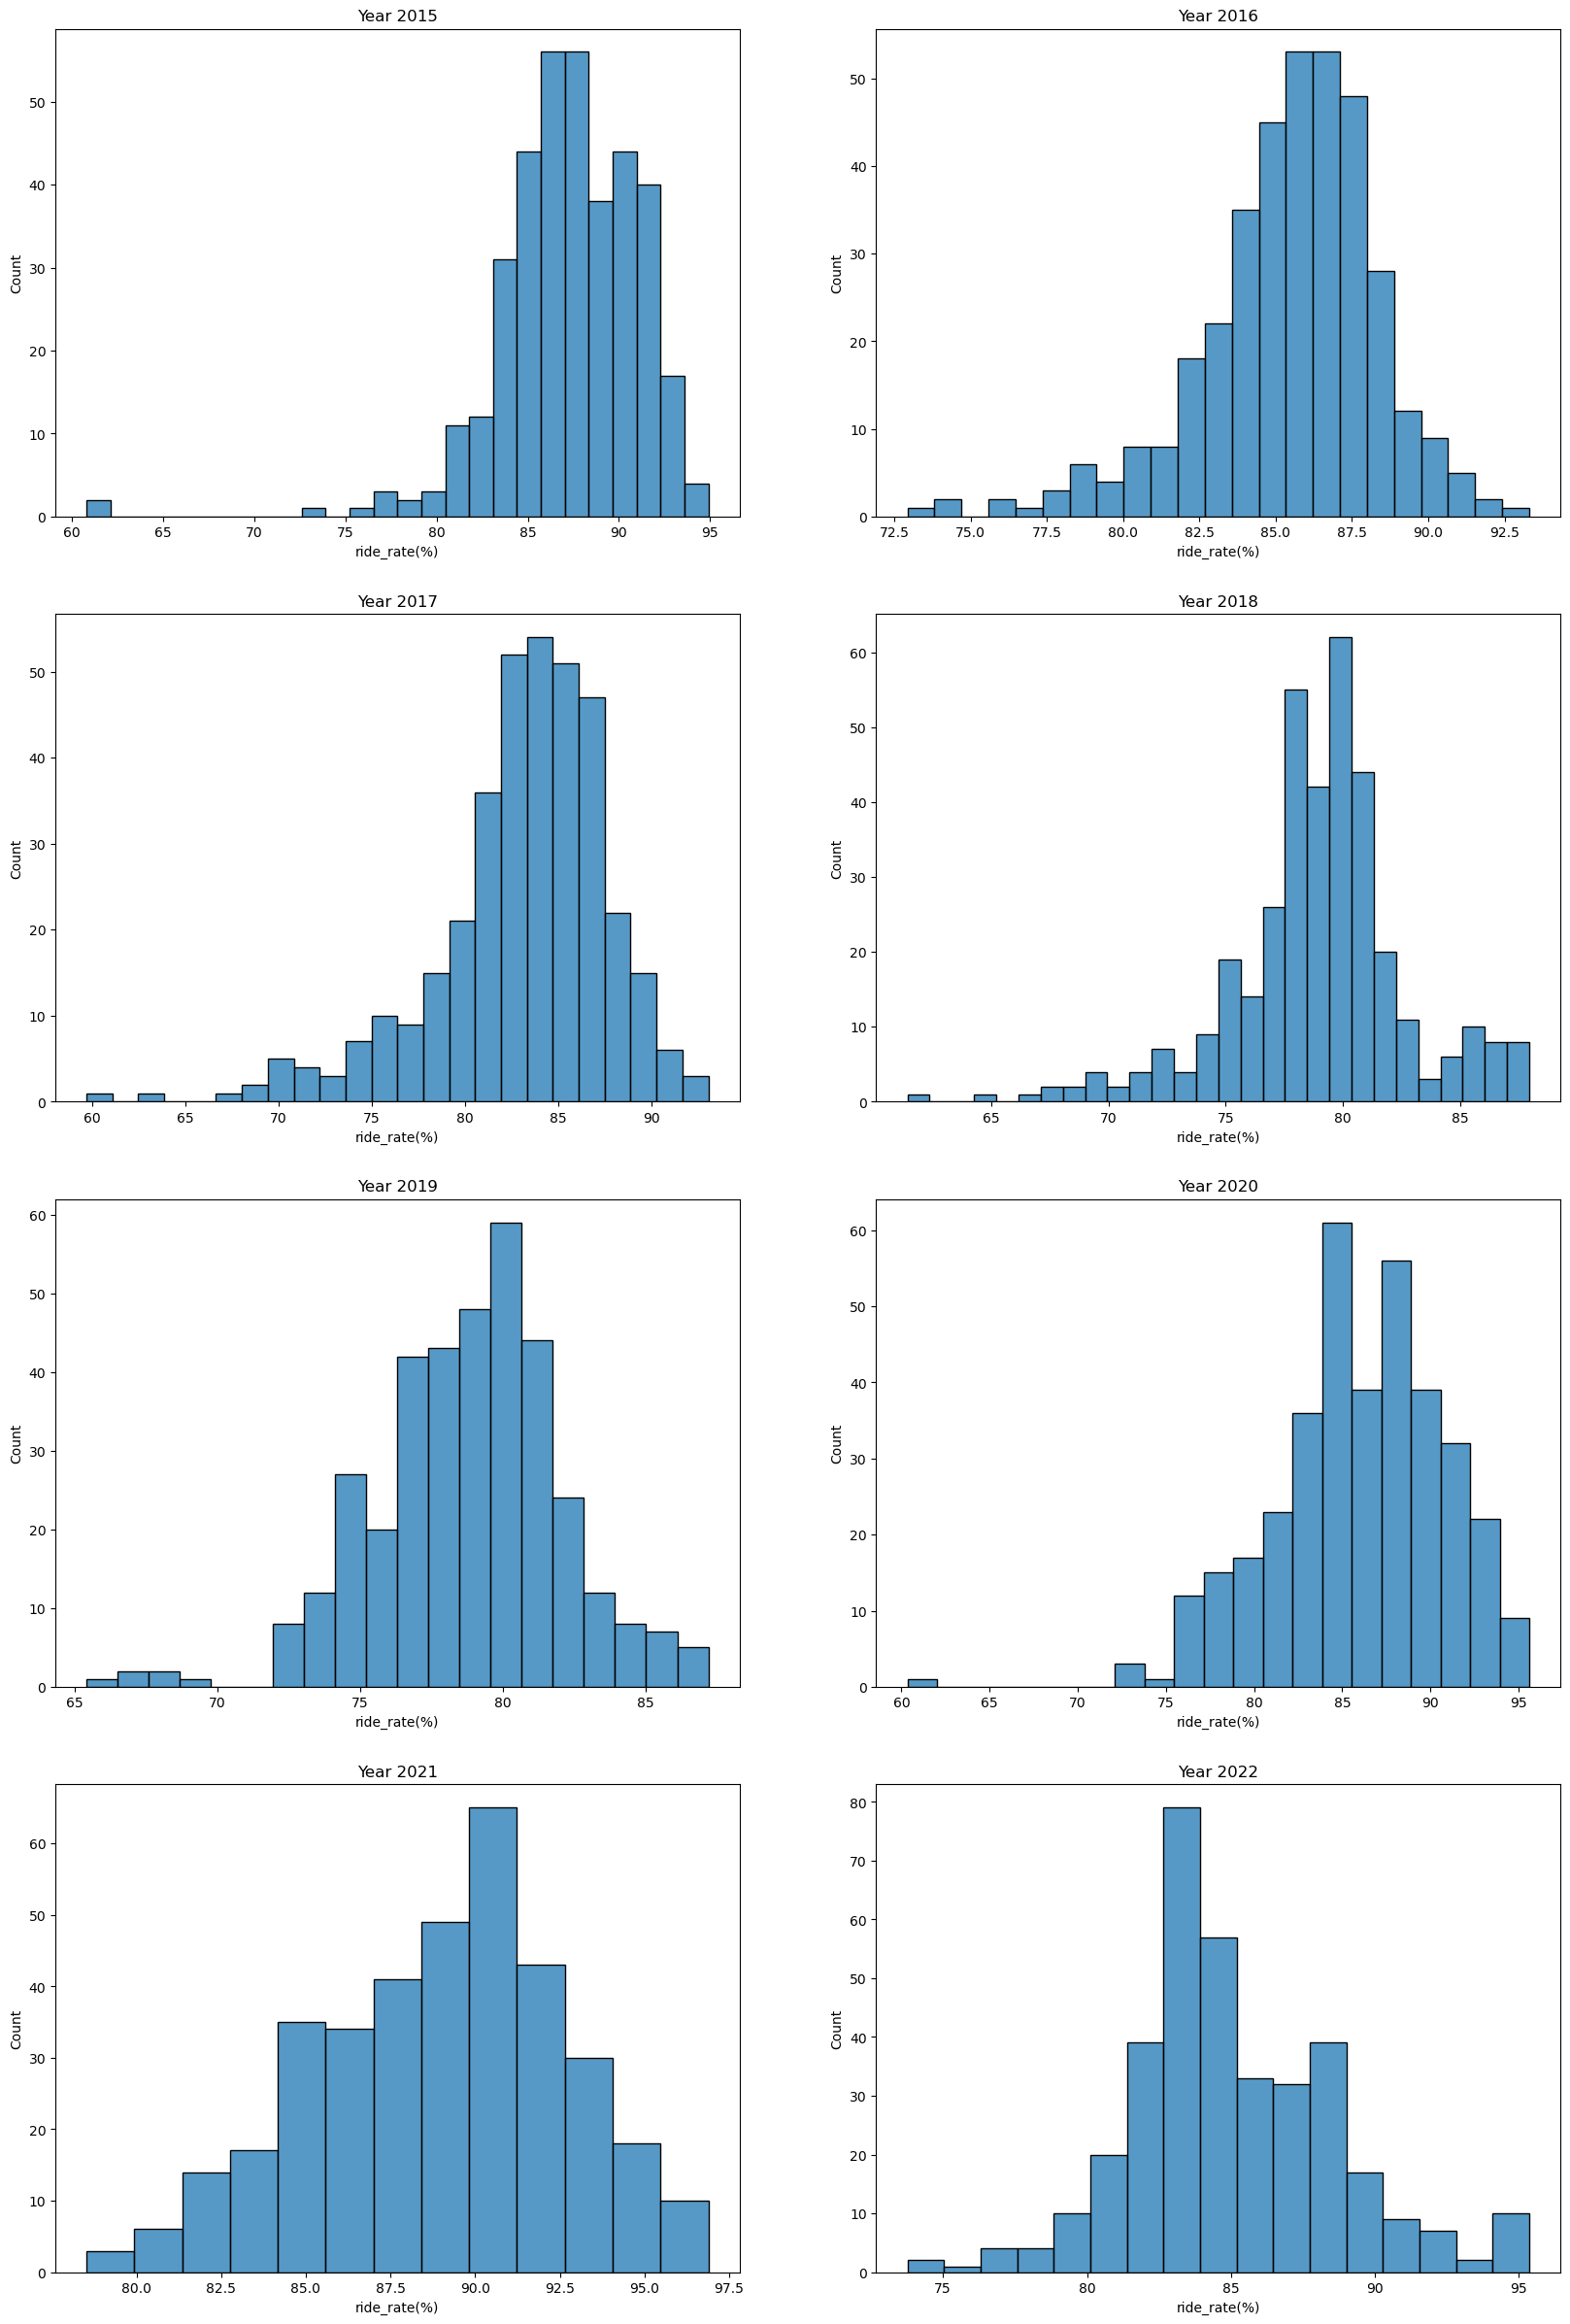

In [228]:
plt.figure(figsize=(20, 30))
for i in range(8):
    plt.subplot(4,2,(i+1))
    plt.title(f"Year {2015+i}")
    sns.histplot(file1.loc[file1['year'] == (2015+i), 'ride_rate(%)'])

<Axes: xlabel='weekday', ylabel='ride_rate(%)'>

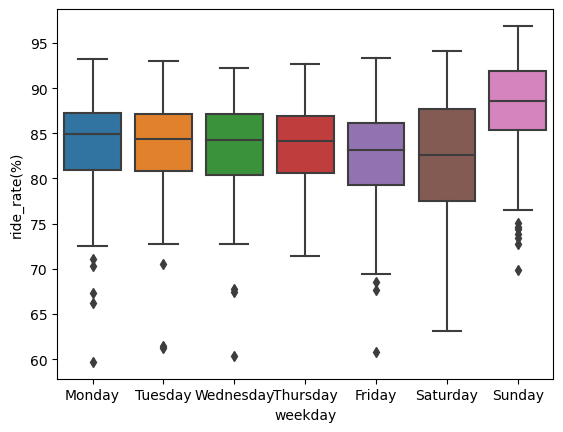

In [229]:
sns.boxplot(x='weekday', y='ride_rate(%)', data=file1, 
            order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

<Axes: xlabel='raining', ylabel='ride_rate(%)'>

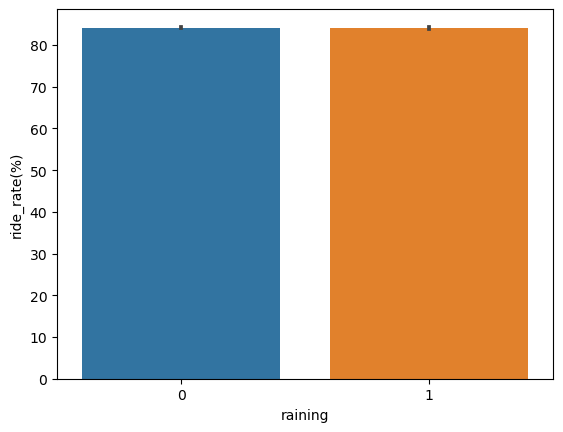

In [230]:
sns.barplot(x='raining', y='ride_rate(%)', data=file1)

### 2. 대기 시간

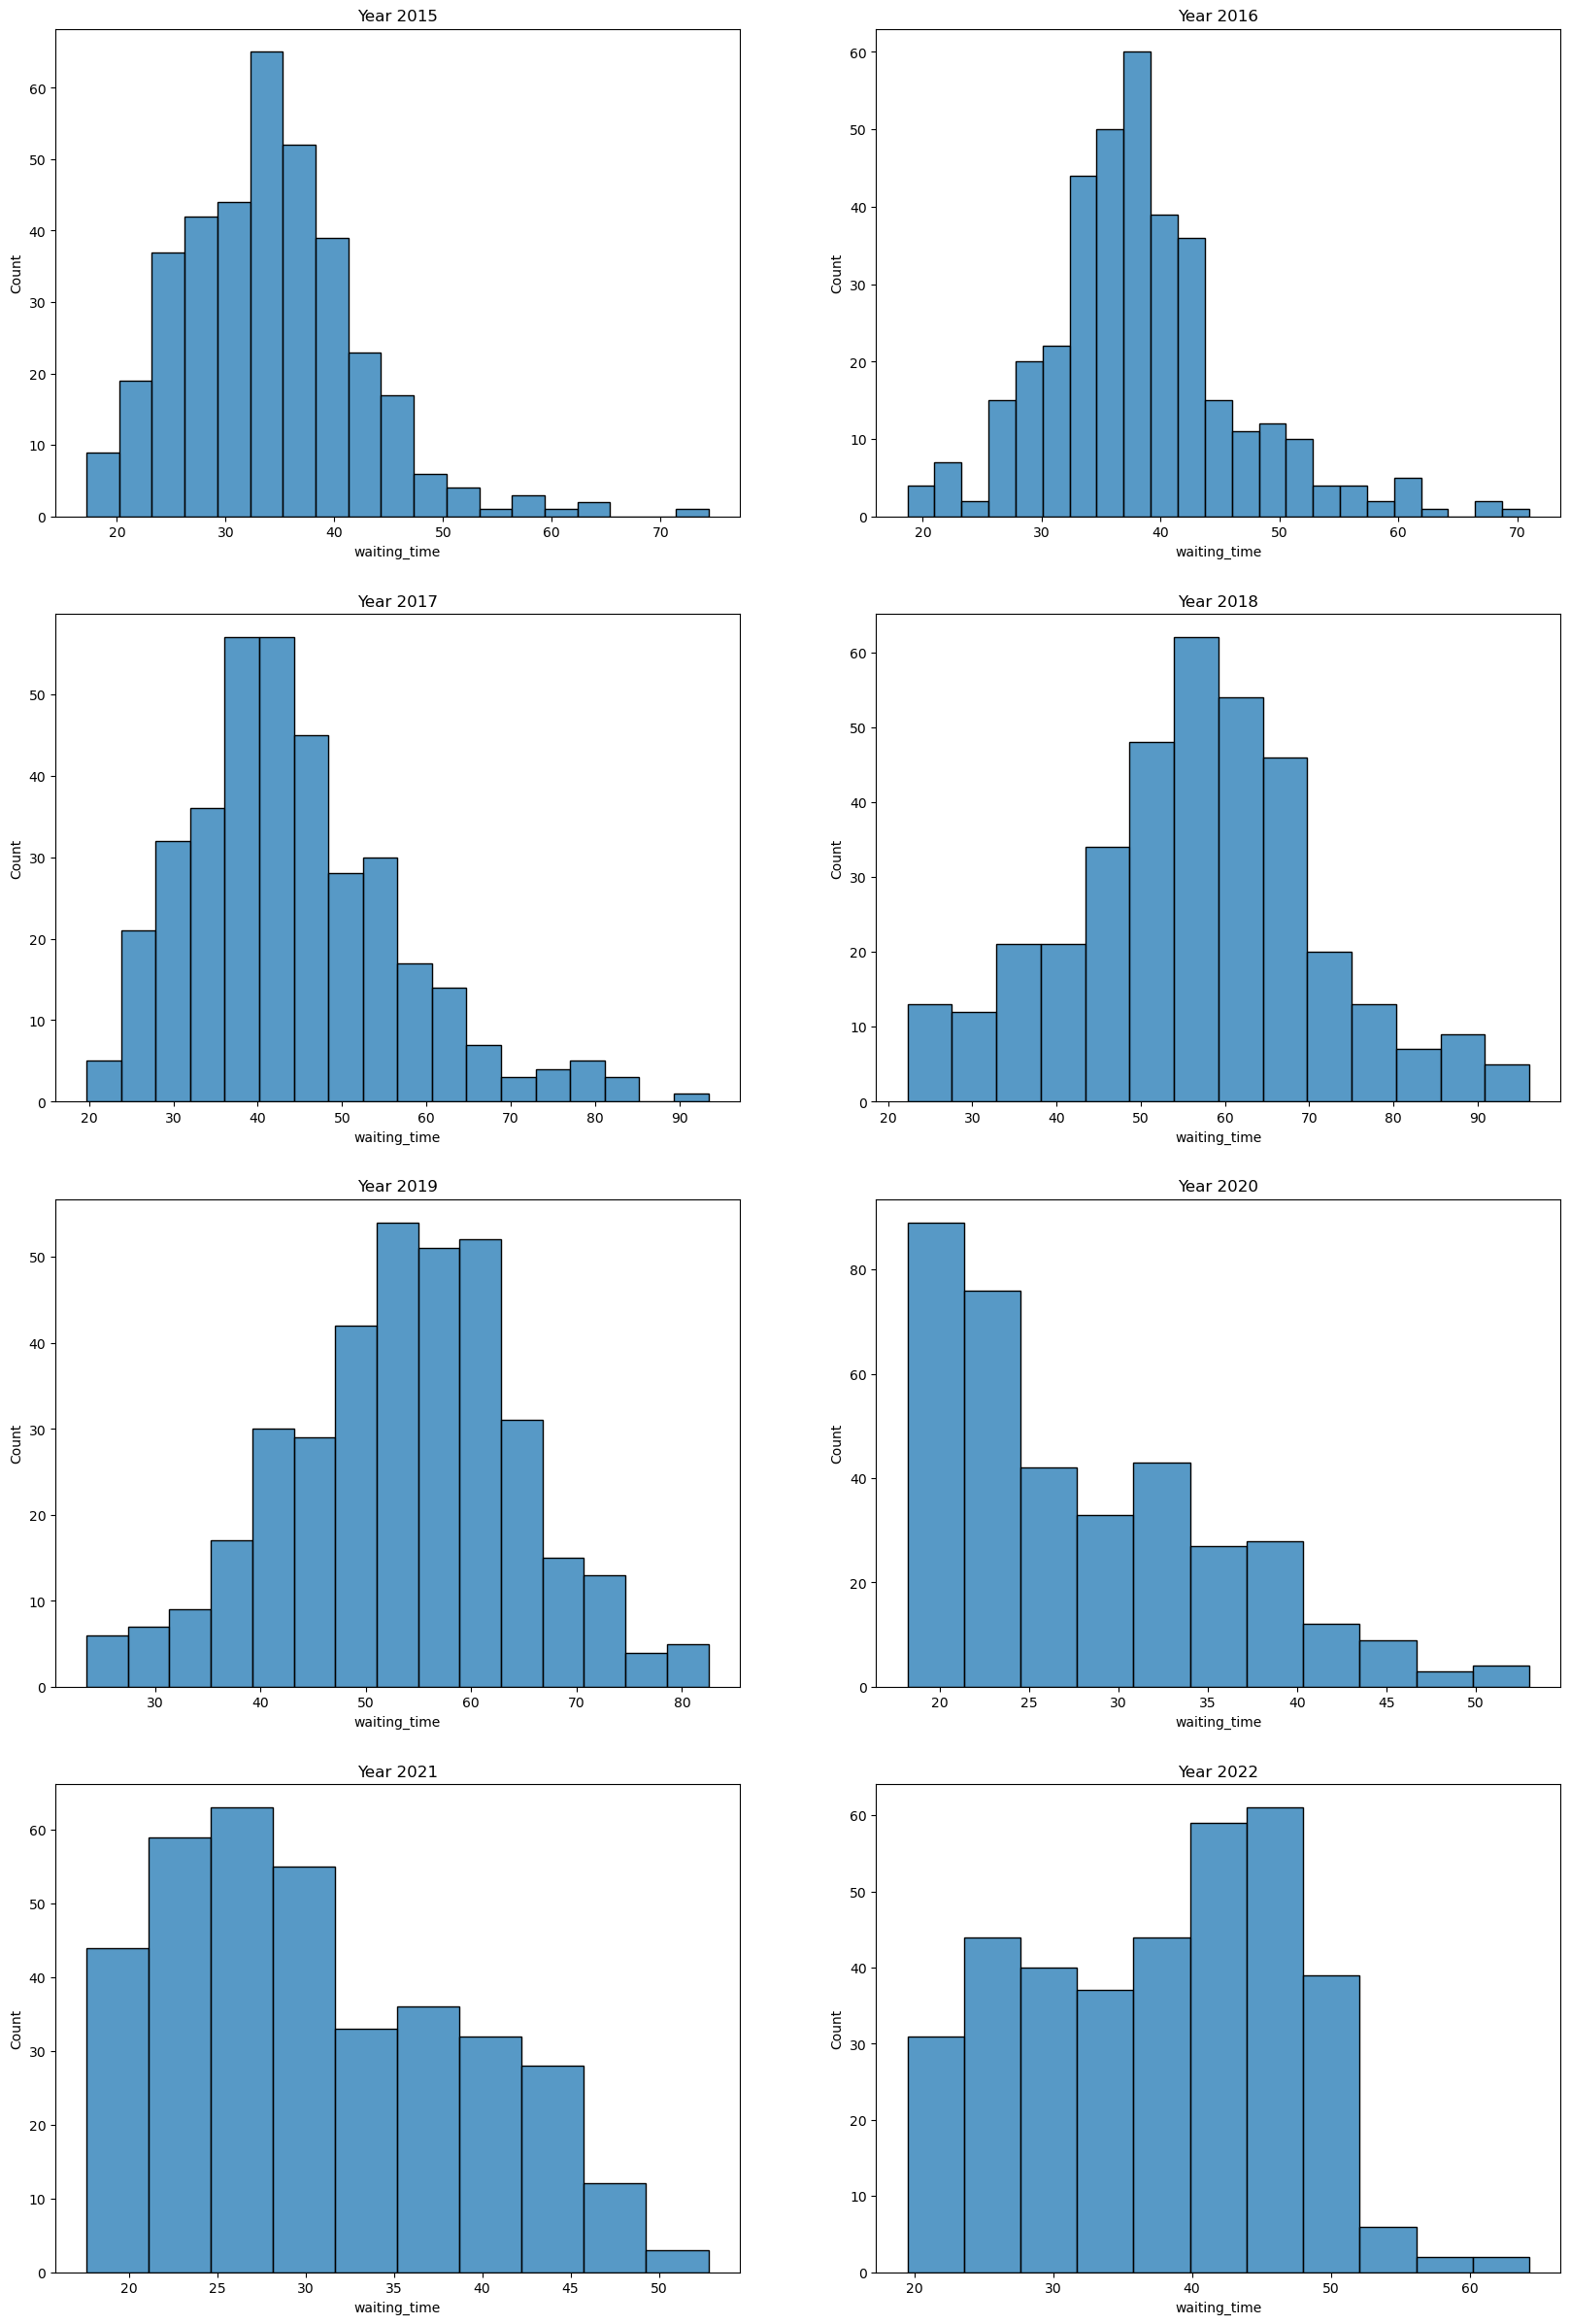

In [231]:
plt.figure(figsize=(20, 30))
for i in range(8):
    plt.subplot(4,2,(i+1))
    plt.title(f"Year {2015+i}")
    sns.histplot(file1.loc[file1['year'] == (2015+i), 'waiting_time'])

<Axes: xlabel='weekday', ylabel='waiting_time'>

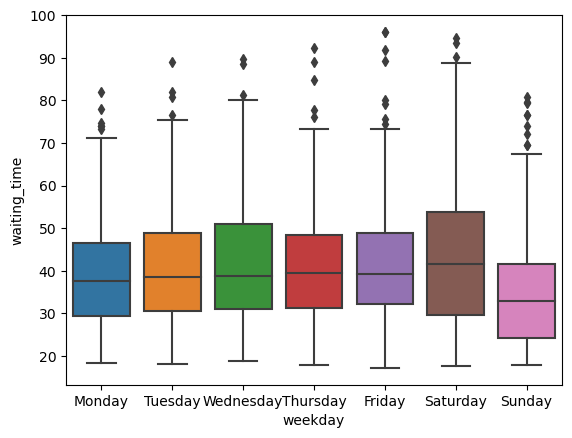

In [232]:
sns.boxplot(x='weekday', y='waiting_time', data=file1, 
            order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

<Axes: xlabel='raining', ylabel='waiting_time'>

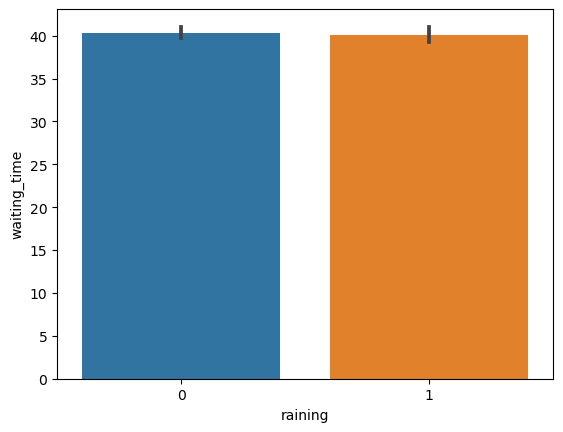

In [233]:
sns.barplot(x='raining', y='waiting_time', data=file1)

### 3. 요금

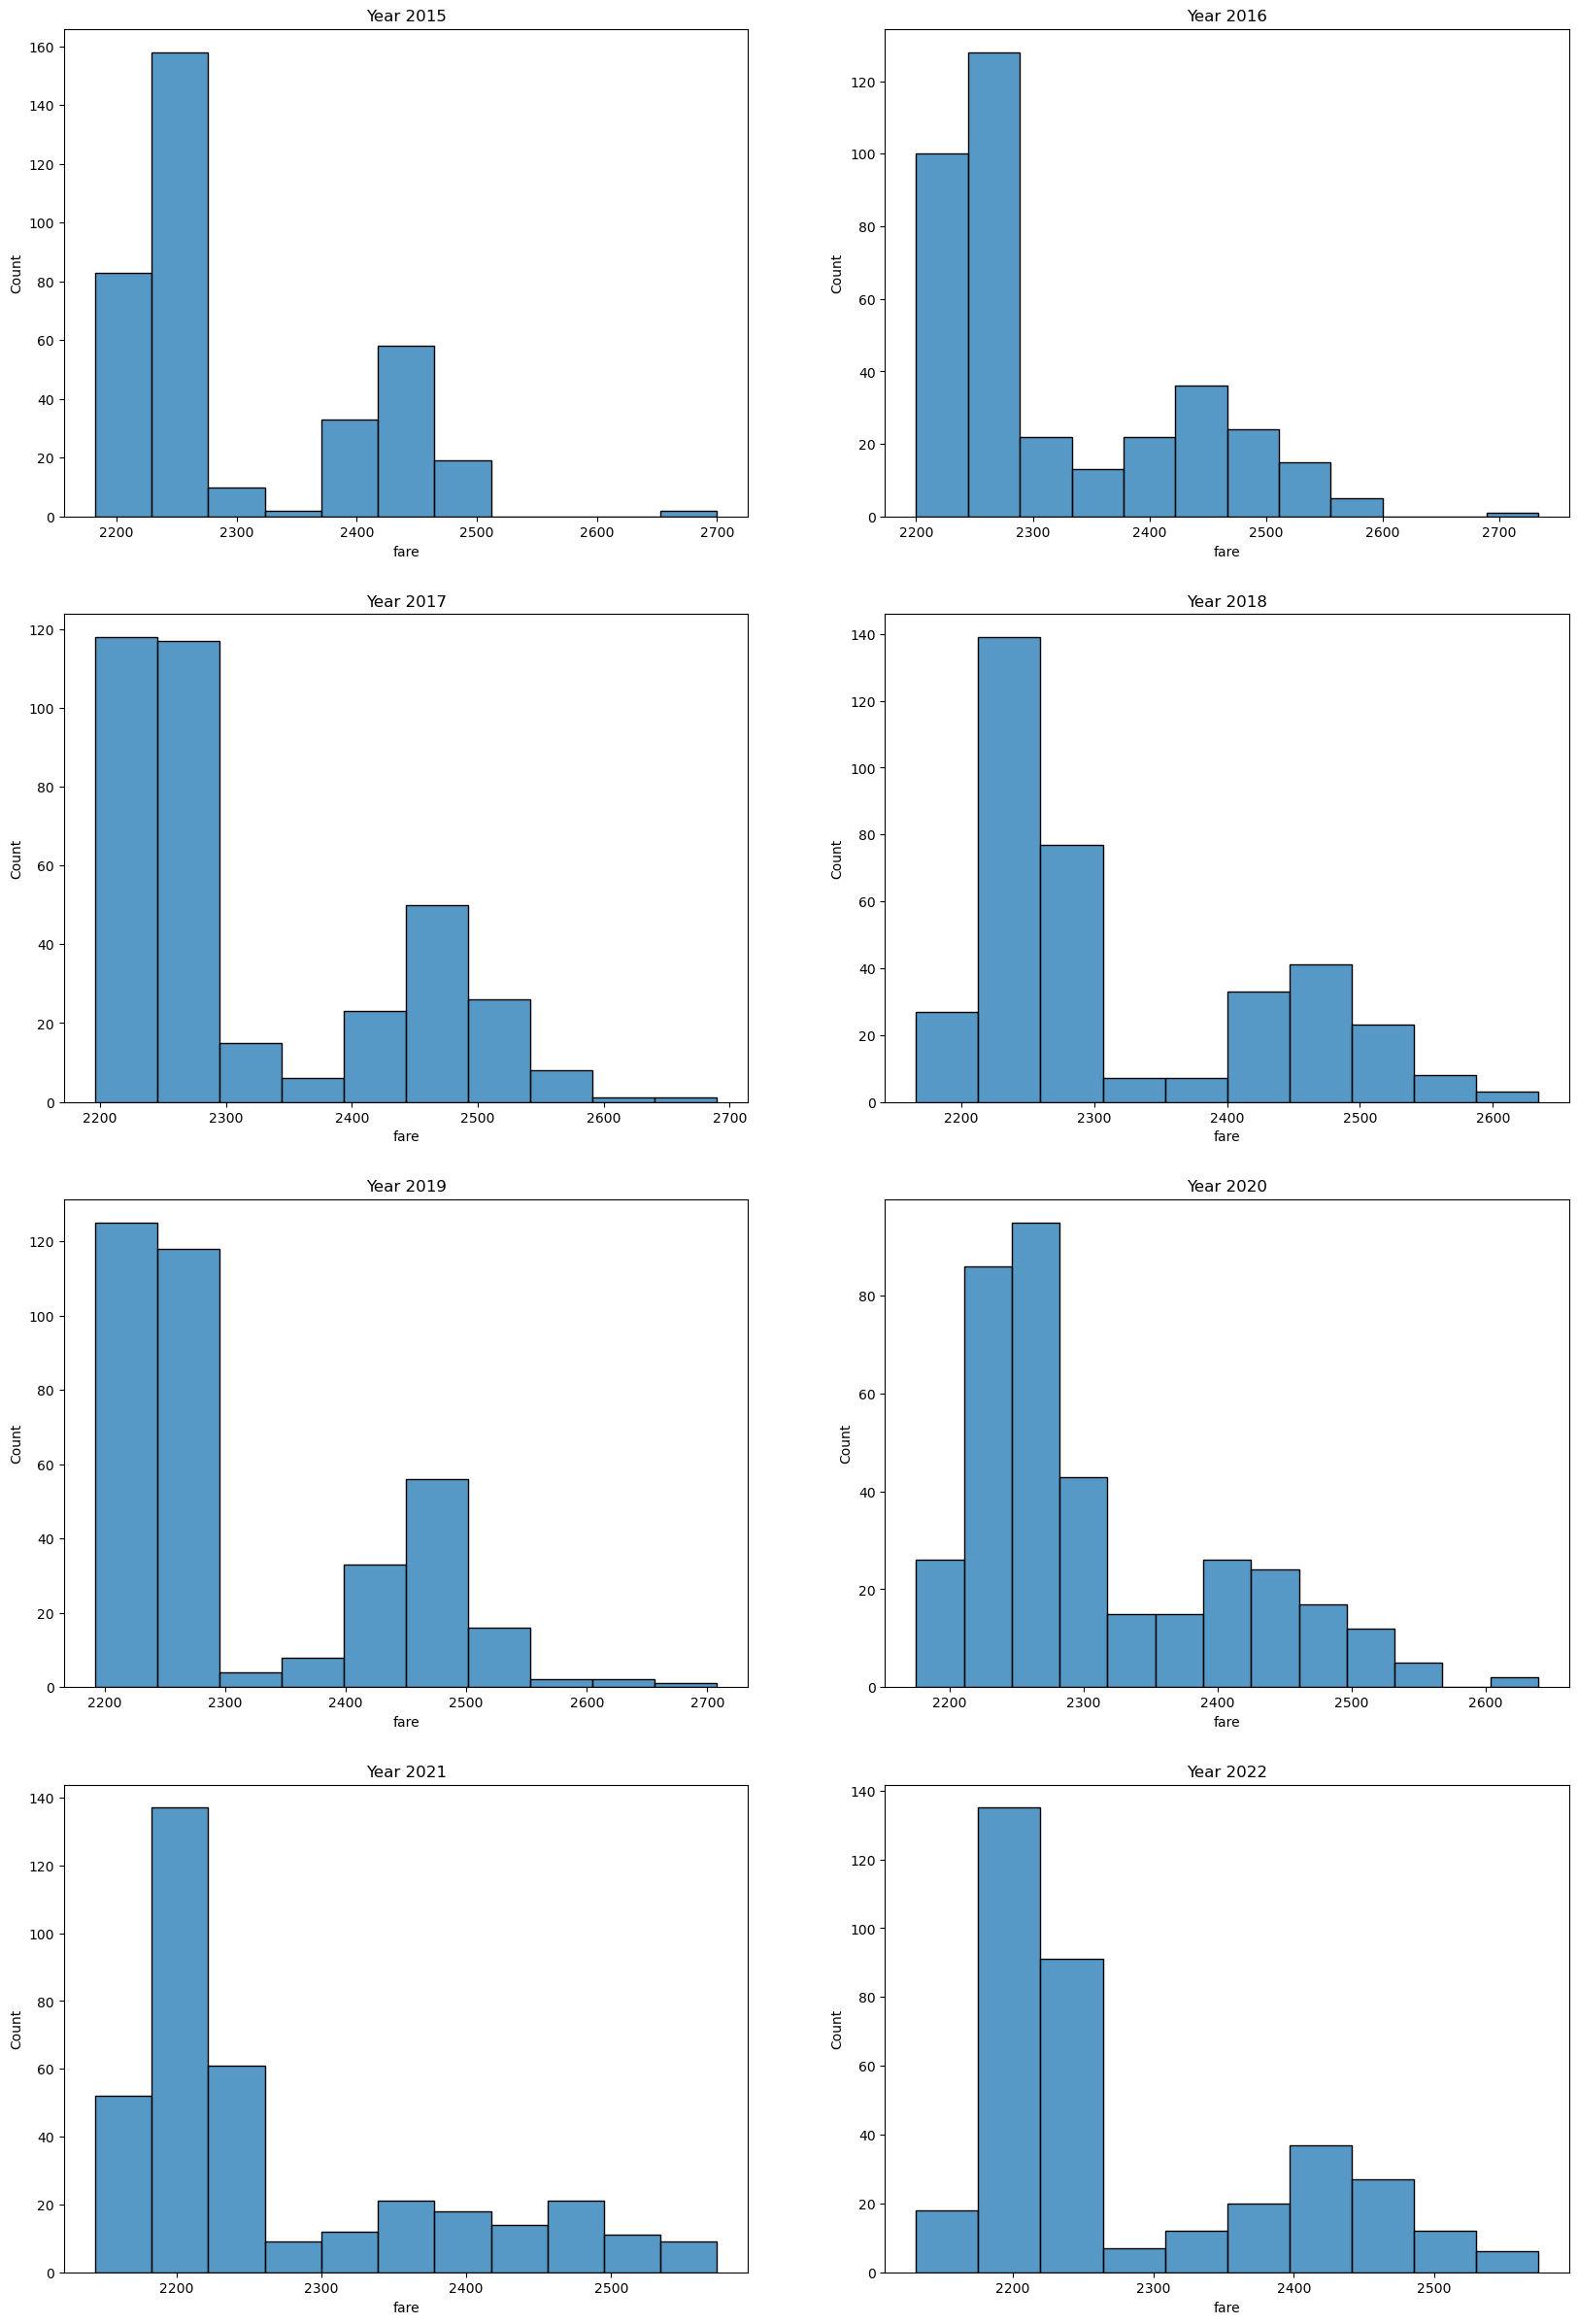

In [234]:
plt.figure(figsize=(20, 30))
for i in range(8):
    plt.subplot(4,2,(i+1))
    plt.title(f"Year {2015+i}")
    sns.histplot(file1.loc[file1['year'] == (2015+i), 'fare'])

<Axes: xlabel='weekday', ylabel='fare'>

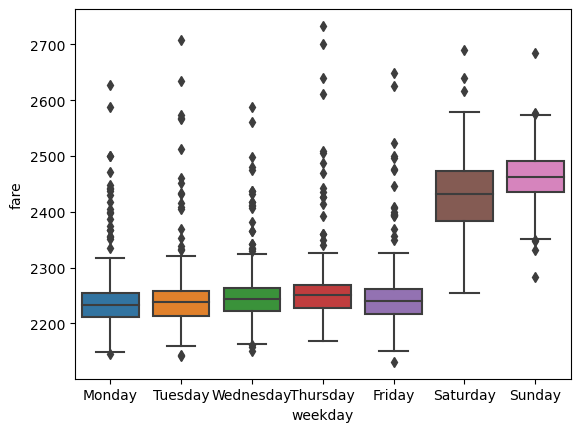

In [235]:
sns.boxplot(x='weekday', y='fare', data=file1, 
            order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

### 4. 이동거리

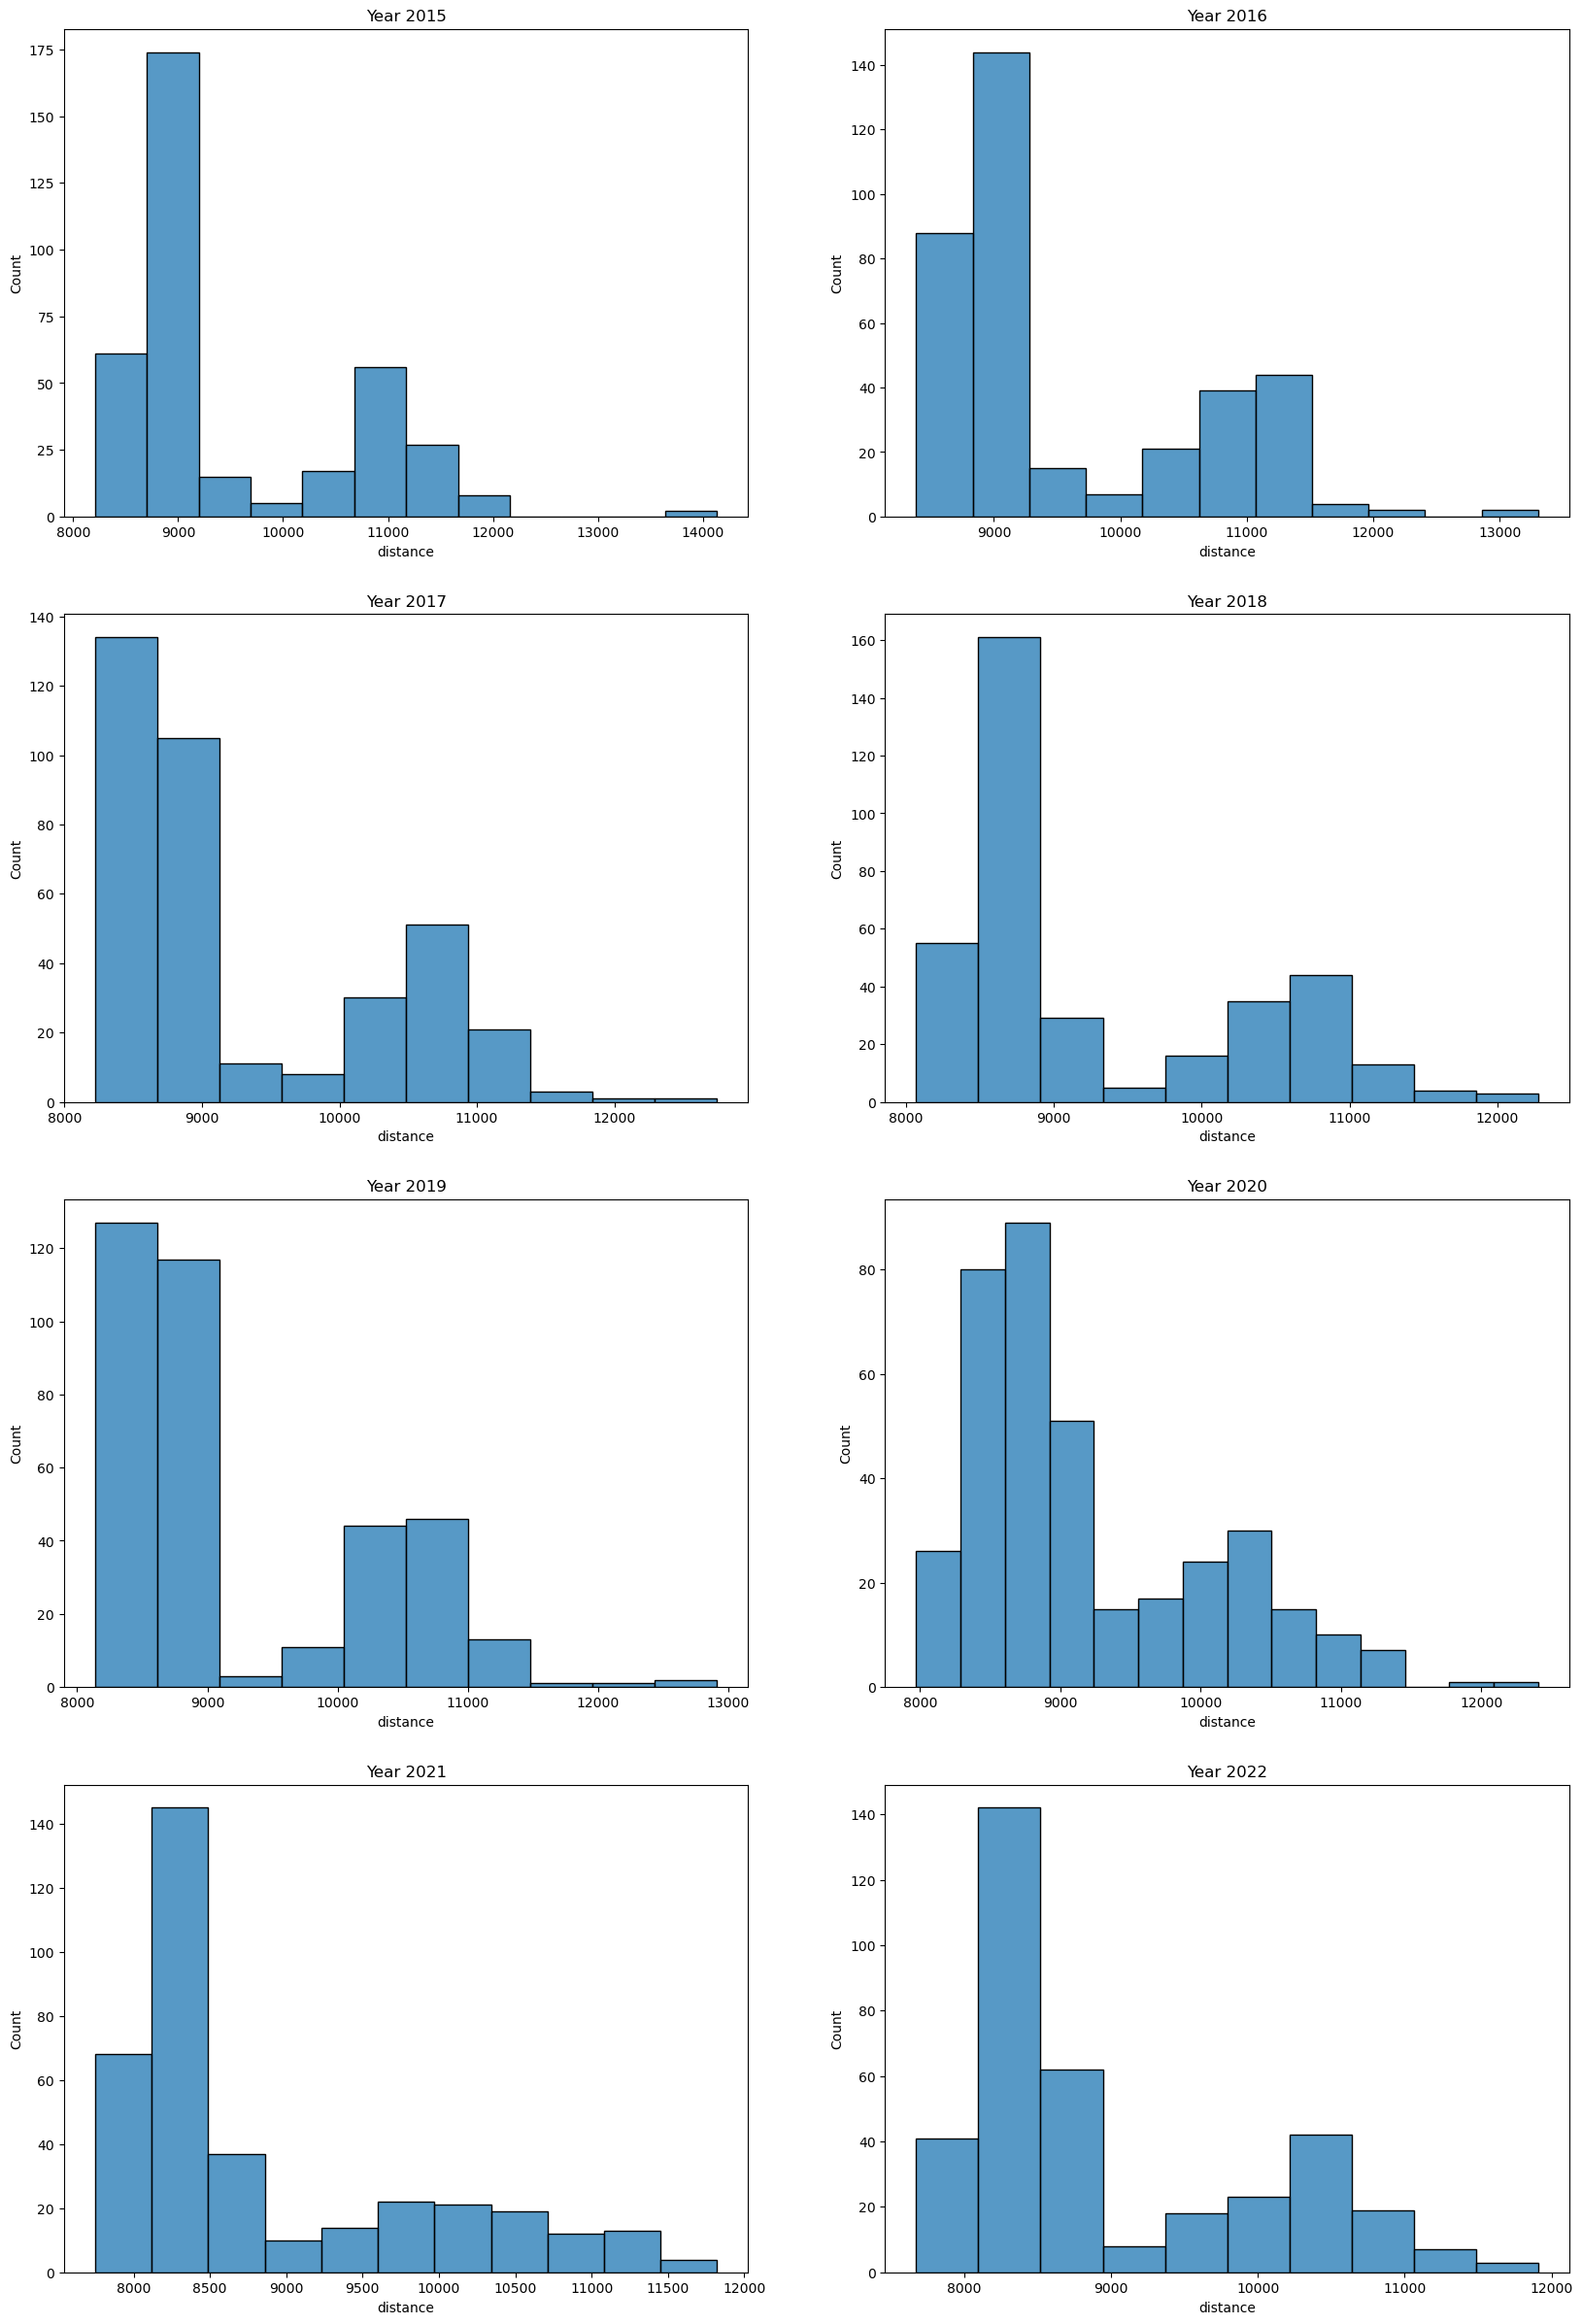

In [236]:
plt.figure(figsize=(20, 30))
for i in range(8):
    plt.subplot(4,2,(i+1))
    plt.title(f"Year {2015+i}")
    sns.histplot(file1.loc[file1['year'] == (2015+i), 'distance'])

<Axes: xlabel='weekday', ylabel='distance'>

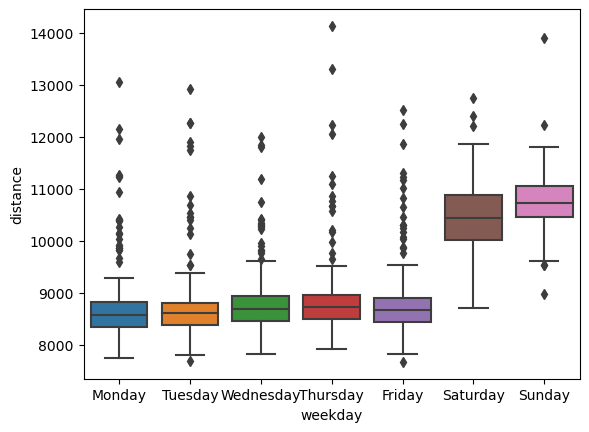

In [237]:
sns.boxplot(x='weekday', y='distance', data=file1, 
            order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

### 5. 날씨 (습도, 강우, 기온 등) 데이터 시각화

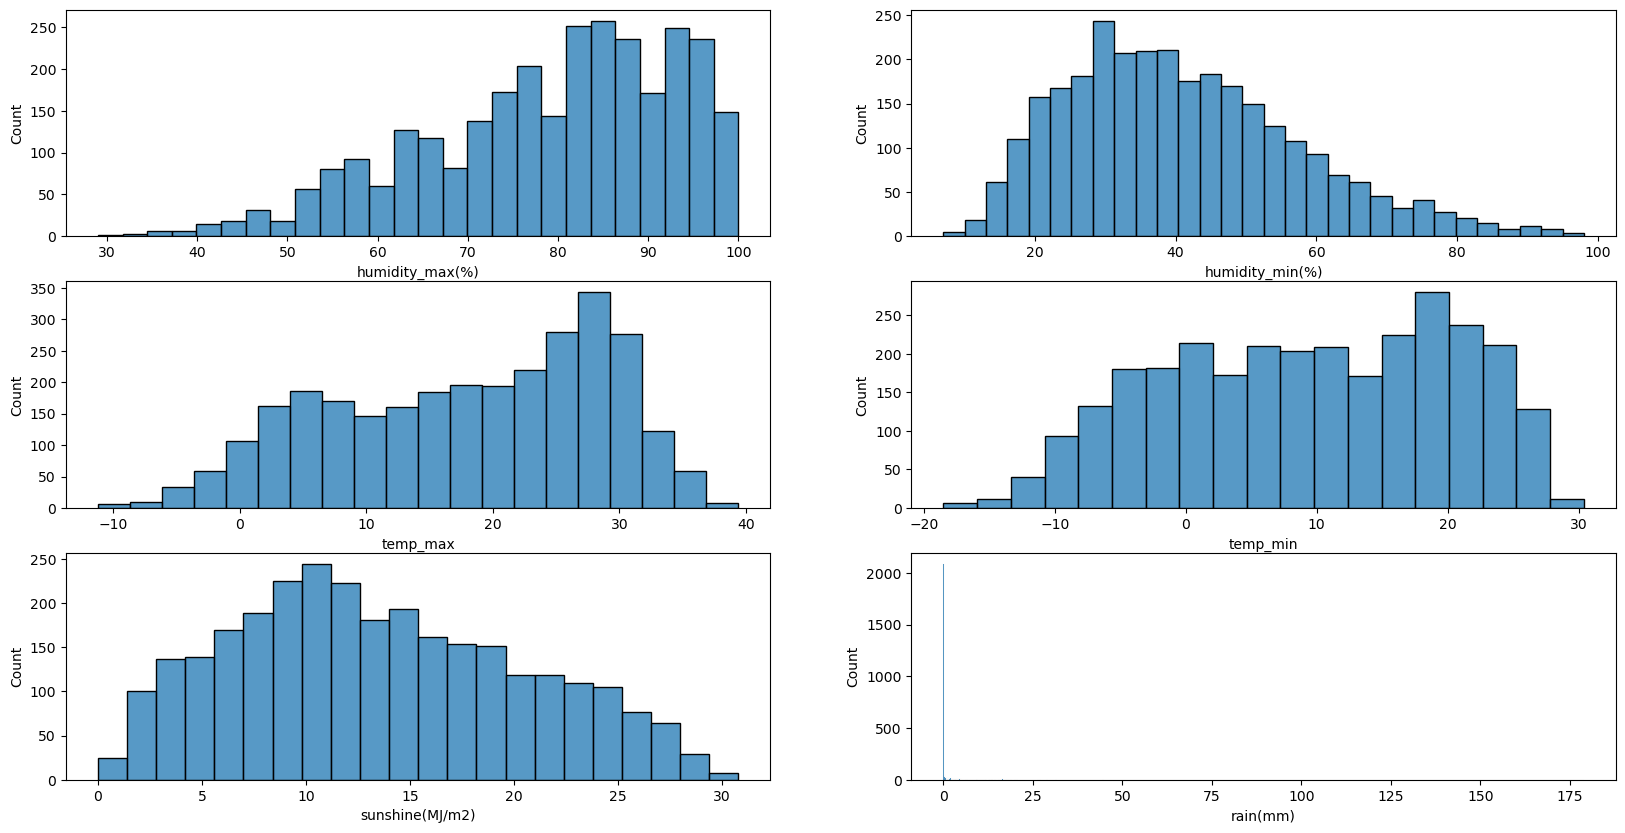

In [238]:
plt.figure(figsize=(20, 10))
plt.subplot(3, 2, 1)
sns.histplot(file1['humidity_max(%)'])
plt.subplot(3, 2, 2)
sns.histplot(file1['humidity_min(%)'])
plt.subplot(3, 2, 3)
sns.histplot(file1['temp_max'])
plt.subplot(3, 2, 4)
sns.histplot(file1['temp_min'])
plt.subplot(3, 2, 5)
sns.histplot(file1['sunshine(MJ/m2)'])
plt.subplot(3, 2, 6)
sns.histplot(file1['rain(mm)'])
plt.show()

### (3) 범주형 변수
* 범주형 변수들에 대해서 단변량 분석을 수행합니다.

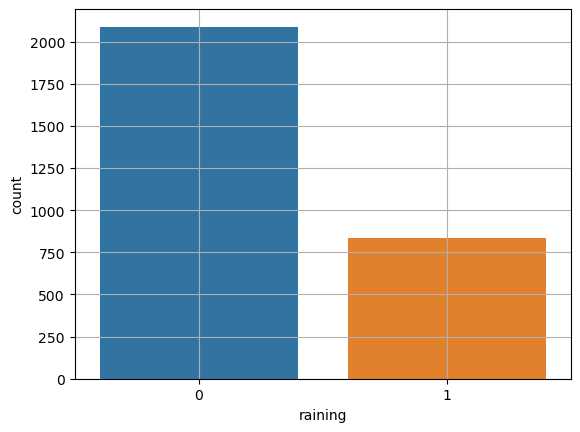

In [239]:
sns.countplot(x = 'raining', data = file1)
plt.grid()
plt.show()

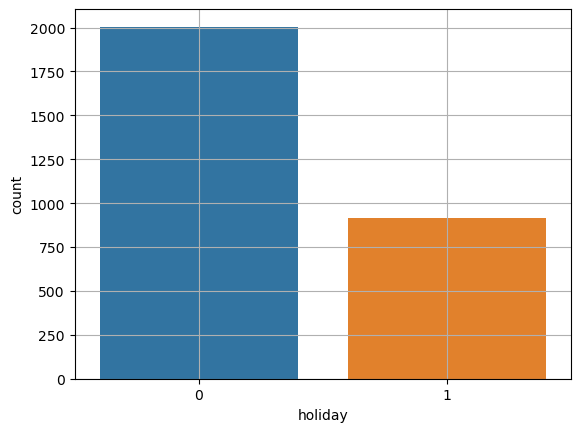

In [240]:
sns.countplot(x = 'holiday', data = file1)
plt.grid()
plt.show()

## 3.EDA 2단계 - feature와 target 비교 분석하기

* **세부요구사항**
    * 숫자 feature --> target
        * 전체 상관계수 구하고 시각화(heatmap)해서 파악해봅시다.
        * 상위 n개의 feature와 target의 상점도를 확인해봅시다.
    * 범주 feature --> target
        * 시각화 : 평균 비교 barplot
        * 수치화 : t-test, anova
    * 이번 단계에서는 함수 생성은 선택사항 입니다.

### (1) 숫자 feature --> Target
* 전체 상관계수 시각화(heatmap)
* 상위 n개 산점도 그리기

#### 1) 전체 상관계수 시각화

C:\Users\user\AppData\Local\Temp\ipykernel_25460\1566319633.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = file1.corr()


<Axes: >

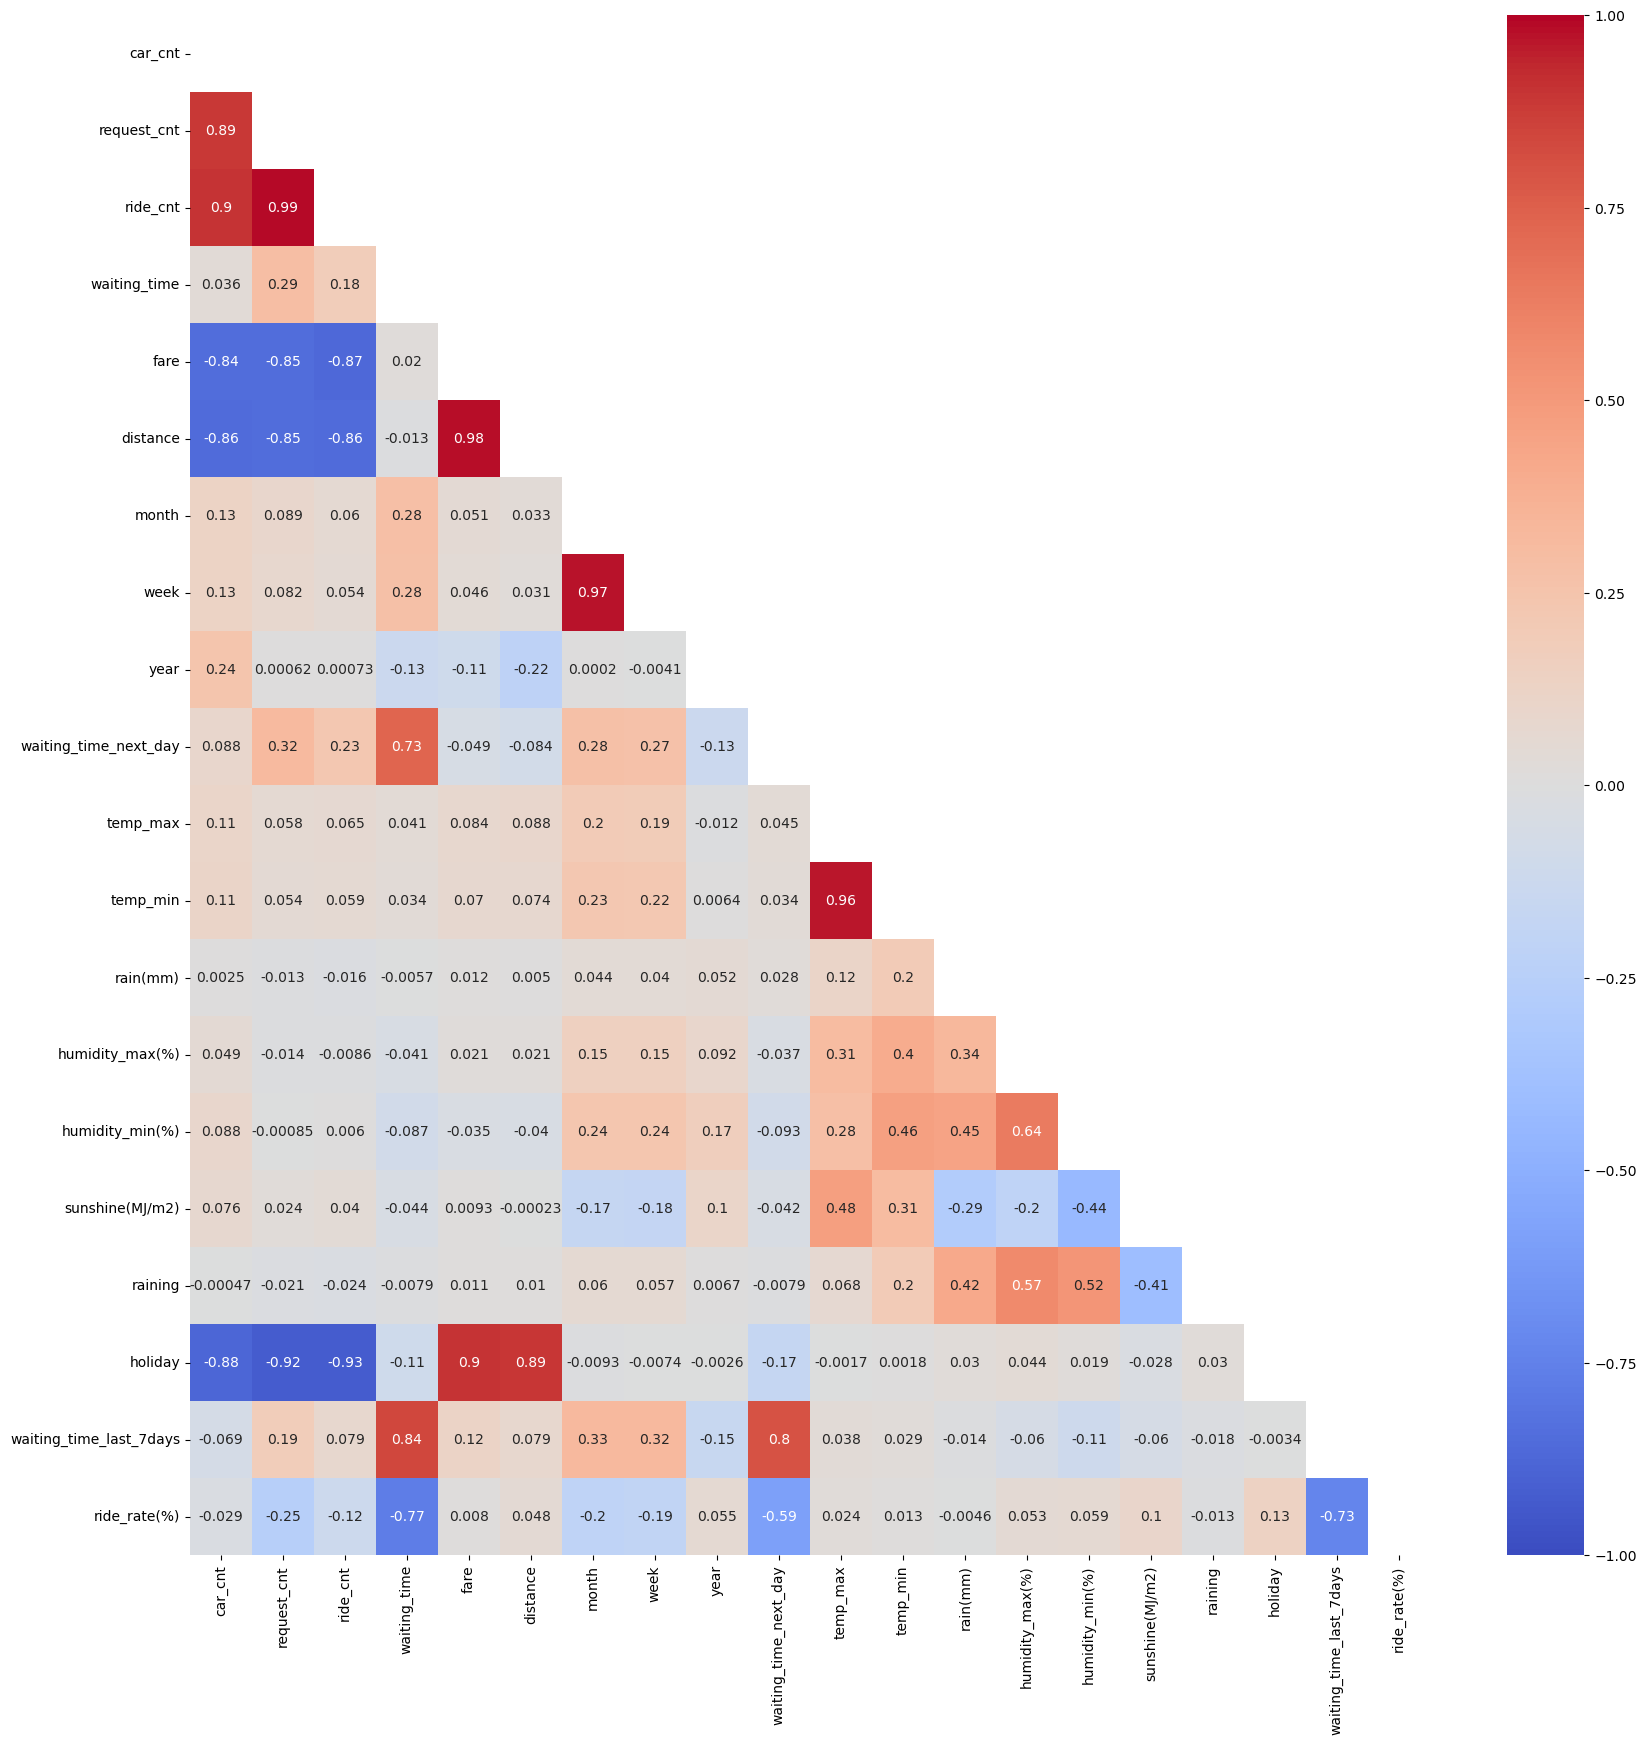

In [241]:
# 히트맵 그리기

plt.figure(figsize=(20, 20))
corr = file1.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, annot=True, mask=mask, cmap='coolwarm', vmin=-1, vmax=1)

In [242]:
corr['waiting_time_next_day'].sort_values(ascending = False)

waiting_time_next_day      1.000000
waiting_time_last_7days    0.799468
waiting_time               0.732299
request_cnt                0.316181
month                      0.276215
week                       0.271254
ride_cnt                   0.229127
car_cnt                    0.087627
temp_max                   0.044556
temp_min                   0.033645
rain(mm)                   0.028373
raining                   -0.007885
humidity_max(%)           -0.036768
sunshine(MJ/m2)           -0.042291
fare                      -0.048772
distance                  -0.083855
humidity_min(%)           -0.092648
year                      -0.125696
holiday                   -0.165560
ride_rate(%)              -0.588797
Name: waiting_time_next_day, dtype: float64

In [243]:
def num_num(data, x, y):
    print(spst.pearsonr(data[x], data[y]))
    plt.scatter(data[x], data[y])

In [244]:
file1_notna = file1.dropna(axis=0)

In [245]:
file1_notna

,car_cnt,request_cnt,ride_cnt,waiting_time,fare,distance,weekday,month,week,year,...,temp_min,rain(mm),humidity_max(%),humidity_min(%),sunshine(MJ/m2),season,raining,holiday,waiting_time_last_7days,ride_rate(%)
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-07,410,4085,3676,24.7,2230,8646,Wednesday,1,2,2015,...,-9.2,0.0,62.0,27.0,10.09,Winter,0,0,23.657143,89.987760
2015-01-08,419,4030,3728,21.2,2231,8683,Thursday,1,2,2015,...,-6.8,0.0,78.0,38.0,8.74,Winter,0,0,23.371429,92.506203
2015-01-09,424,4167,3813,21.8,2215,8506,Friday,1,2,2015,...,-5.5,0.0,81.0,33.0,9.41,Winter,0,0,24.028571,91.504680
2015-01-10,215,1916,1645,41.2,2447,11123,Saturday,1,2,2015,...,-4.0,0.0,83.0,39.0,9.60,Winter,0,1,26.171429,85.855950
2015-01-11,187,1700,1572,28.8,2419,10806,Sunday,1,2,2015,...,-7.2,0.0,51.0,23.0,10.05,Winter,0,1,26.785714,92.470588
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-26,603,5555,4605,39.2,2163,7889,Monday,12,52,2022,...,-7.3,0.0,86.0,51.0,10.25,Winter,0,0,43.485714,82.898290
2022-12-27,669,5635,4654,44.4,2198,8178,Tuesday,12,52,2022,...,-5.4,0.1,92.0,40.0,10.86,Winter,1,0,42.771429,82.590949
2022-12-28,607,5654,4648,44.8,2161,7882,Wednesday,12,52,2022,...,-7.8,0.0,71.0,34.0,10.88,Winter,0,0,43.514286,82.207287


#### 2) 산점도

PearsonRResult(statistic=0.7994675069731794, pvalue=0.0)


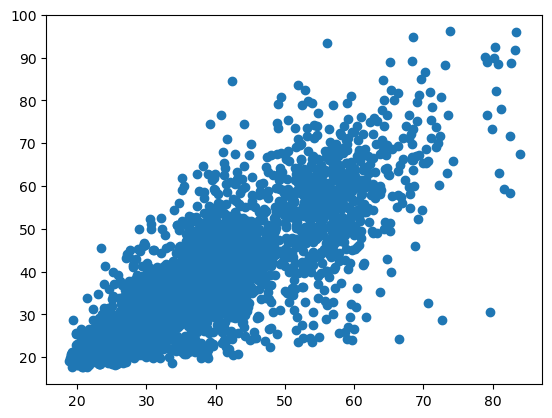

In [246]:
num_num(file1_notna, 'waiting_time_last_7days', 'waiting_time_next_day')

PearsonRResult(statistic=0.7316105568757976, pvalue=0.0)


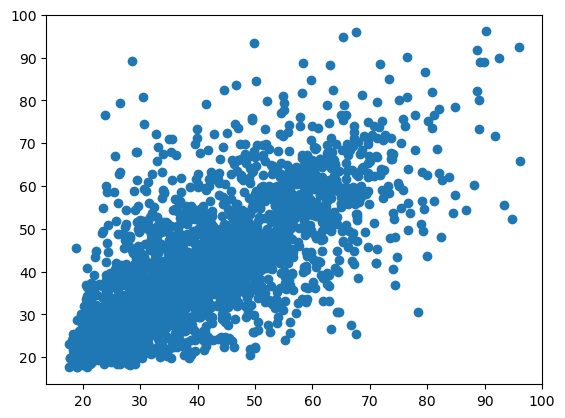

In [247]:
num_num(file1_notna, 'waiting_time_next_day', 'waiting_time')

PearsonRResult(statistic=-0.5876831138451041, pvalue=2.4942957850408977e-270)


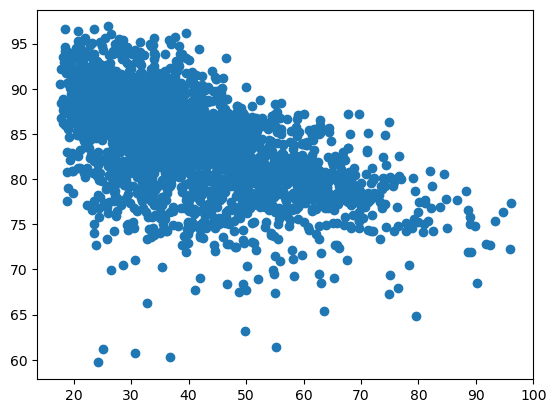

In [248]:
num_num(file1_notna, 'waiting_time_next_day', 'ride_rate(%)')

### (2) 범주 feature --> Target

* 범주형 변수들과 target 간의 관계를 살펴봅시다.
    * 시각화 : 평균비교 barplot
    * 수치화 : t-검정, anova

### 1 - 계절

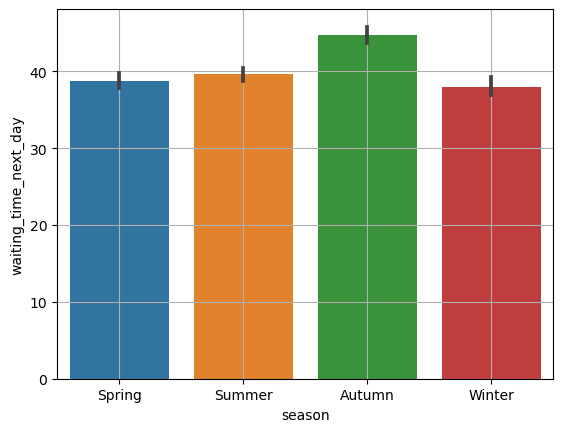

In [249]:
sns.barplot(x = 'season', y = 'waiting_time_next_day', data = file1)
plt.grid()
plt.show()

In [250]:
spring = file1_notna.loc[file1_notna['season'] == 'Spring', 'waiting_time_next_day']
summer = file1_notna.loc[file1_notna['season'] == 'Summer', 'waiting_time_next_day']
autumn = file1_notna.loc[file1_notna['season'] == 'Autumn', 'waiting_time_next_day']
winter = file1_notna.loc[file1_notna['season'] == 'Winter', 'waiting_time_next_day']

In [251]:
spst.f_oneway(spring, summer, autumn, winter)

F_onewayResult(statistic=34.31299108787449, pvalue=8.673286513863438e-22)

### 2 - 요일

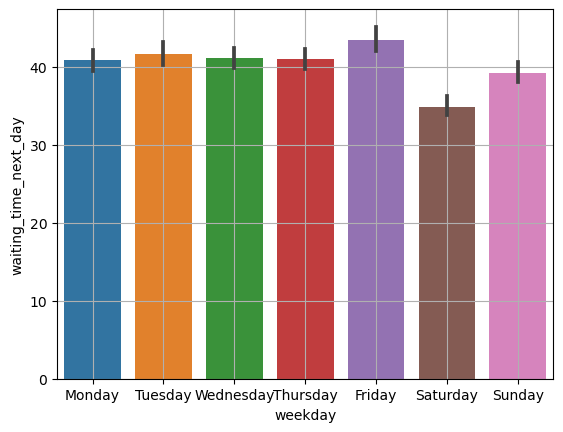

In [252]:
sns.barplot(x = 'weekday', y = 'waiting_time_next_day', data = file1,
           order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday',
                 'Saturday', 'Sunday'])
plt.grid()
plt.show()

In [253]:
weekdays = []

In [254]:
for i in range(7):
    weekdays.append(file1_notna.loc[file1_notna['weekday'] == file1_notna['weekday'].unique()[i], 'waiting_time_next_day'])

In [255]:
spst.f_oneway(weekdays[0], weekdays[1], weekdays[2], weekdays[3], weekdays[4], weekdays[5], weekdays[6])

F_onewayResult(statistic=15.744329328371656, pvalue=7.11330449902464e-18)

### 3 - 년

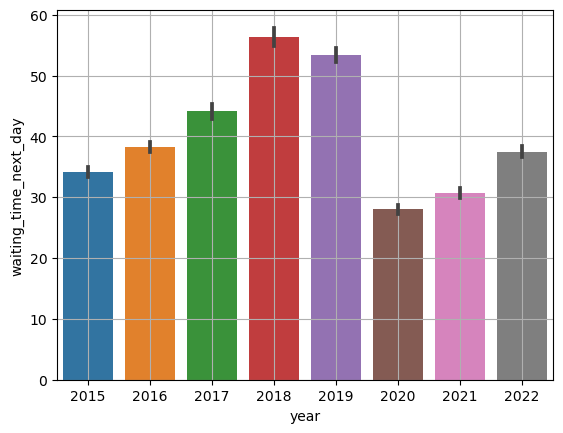

In [256]:
sns.barplot(x = 'year', y = 'waiting_time_next_day', data = file1)
plt.grid()
plt.show()

In [257]:
years = []

In [258]:
for i in range(2015, 2023):
    years.append(file1_notna.loc[file1_notna['year'] == i, 'waiting_time_next_day'])

In [259]:
spst.f_oneway(years[0],years[1],years[2],years[3],years[4],years[5],years[6], years[7])

F_onewayResult(statistic=359.6723682097498, pvalue=0.0)

### 4 - 강우 여부

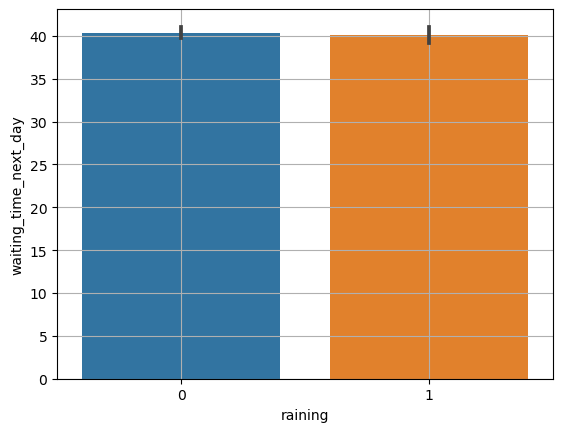

In [260]:
sns.barplot(x = 'raining', y = 'waiting_time_next_day', data = file1)
plt.grid()
plt.show()

In [261]:
spst.ttest_ind(file1_notna.loc[file1_notna['raining'] == 0, 'waiting_time_next_day'], 
              file1_notna.loc[file1_notna['raining'] == 1, 'waiting_time_next_day'])

Ttest_indResult(statistic=0.4606056893188843, pvalue=0.645115911459265)

### 5 - holiday 유무

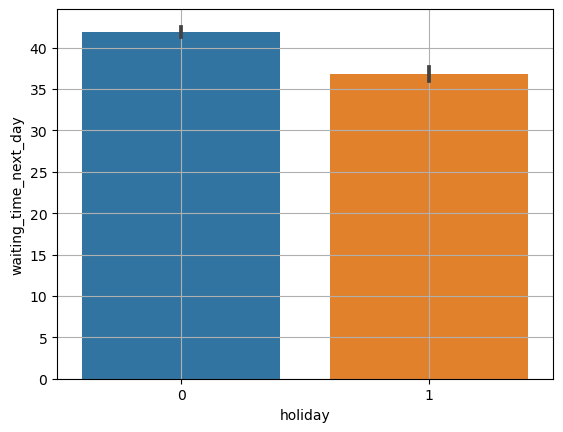

In [262]:
sns.barplot(x = 'holiday', y = 'waiting_time_next_day', data = file1)
plt.grid()
plt.show()

In [263]:
spst.ttest_ind(file1_notna.loc[file1_notna['holiday'] == 0, 'waiting_time_next_day'], 
              file1_notna.loc[file1_notna['holiday'] == 1, 'waiting_time_next_day'])

Ttest_indResult(statistic=9.022518495044496, pvalue=3.25702543187131e-19)

## 4.변수 정리

* Target과 관련성이 높은 feature와 그렇지 않은 feature를 정리합니다.
* 여기서의 판단은 다소 주관적입니다. 조금 정확하지 않아도 괜찮습니다.
* 다음 단계 모델링에서 관련이 적은 변수는 포함시키거나, 제외를 고려할때 활용합니다.

* 강한 관계의 변수

In [155]:
# year(년), weekday(요일), season(계절 - [Spring, Summer, Fall, Winter]), holiday(공휴일 및 주말 유무) 
# waiting_time(당일 대기시간), waiting_time_last_7days(최근 7일간의 평균 대기 시간)

* 중간(약한) 관계의 변수

In [ ]:
# ride_rate(탑승률)

* (거의) 관계가 없는 변수

In [ ]:
# raining(강우 여부)

## 5.데이터 저장

* **세부 요구사항**
    * 혹시 데이터에 변경이 발생할 수 있으니, 저장해 놓읍시다.
    * joblib.dump를 이용하시오.
    * 저장할 파일 이름 : data2.pkl

In [264]:
joblib.dump(file1_notna, './data2.pkl')

['./data2.pkl']